# Synthèse des Images
# TP 2 : Courbes B-Spline
## Matéo Gatel, UPSSITECH 2A SRI, Groupe 2

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Puisque les polynomes sont décrit dans des fichiers (dans le dossier DATA), cette fonction permet de lire les points et de les compter

In [2]:
def loadPoints(path):
    i = 0
    with open(path, "r") as f:
        points = list()
        for line in f:
            i = i+1
            if "#" in line:
                # on saute la ligne
                continue
            data = line.split()
            points.append((float(data[0]), float(data[1])))
    nbPoints = i
    return nbPoints, points

Cette fonction permet d'afficher sur la même figure le polygone de contrôle, de référence avec les points de son fichier ainsi que le résultat des courbes de Bézier

In [3]:
def afficher(path, bspine, affPol = True):
    nbPoints, points = loadPoints(path)
    Xp = []
    Yp = []
    Xs = []
    Ys = []

    if affPol:
        for i in range(len(points)):
            Xp.append(points[i][0])
            Yp.append(points[i][1])

    for j in range(len(bspine)):
        Xs.append(bspine[j][0])
        Ys.append(bspine[j][1])

    if affPol:
        plt.plot(Xp, Yp)
    plt.plot(Xs, Ys)
    plt.show()

Fonction permettant de récupérer un vecteur nodal uniforme, ouvert uniforme ou quelconque en fonction du paramètre donné

In [4]:
def getNodal(type, k, n):
    nodal = []
    if type == "UNIFORME":
        nodal = [_ for _ in range(k+n)]
    elif type == "OUVERT UNIFORME":
        nbNod = 0
        for i in range(k):
            nodal.append(0)
        for i in range(k+n-k-k):
            nbNod = nbNod+1
            nodal.append(nbNod)
        nbNod = nbNod + 1
        for i in range(k):
            nodal.append(nbNod)
    elif type == "QUELCONQUE":
        borneMin = -2000
        borneMax =  2000
        rand = random.randrange(borneMin, borneMax)
        nodal.append(rand)
        for i in range(1, k+n):
            rand = random.randrange(borneMin, borneMax)
            while rand < nodal[i-1] or rand - nodal[i-1] > 100:
                rand = random.randrange(borneMin, borneMax)
            nodal.append(rand)
    return nodal


 Implémentation de l'algorithme de floraison (Cox - De Boor) pour l'évaluation d'un point sur une B-Spline

In [5]:
def bSpine(k, n, U, points):
    m = k-1
    pas = 0.001
    res = []
    for u in np.arange(U[k-1], U[n+1], pas):
        j = k
        dec = 0
        while u > U[j]:
            j = j+1
            dec = dec+1
        Pcale = []
        for l in range(k):
            Pcale.append(points[dec+l])
        for j in range(0, k-1):
            for i in range(0, k-1-j):
                uMax = U[dec+k+i]
                uMin = U[dec+1+i+j]
                Pcale[i] = (Pcale[i][0] * (uMax-u)/(uMax-uMin) + Pcale[i+1][0] * (u - uMin)/(uMax - uMin),
                            Pcale[i][1] * (uMax-u)/(uMax-uMin) + Pcale[i+1][1] * (u - uMin)/(uMax - uMin))
        res.append(Pcale[0])
    return res

Tests sur une courbe simple (ordre k=3; 4 points de contrôle; vecteur nodal uniforme)

In [6]:
k = 3
path = "../DATA/4pts.txt"
nbPoint, points = loadPoints(path)
n = nbPoint-1
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Tests sur une courbe simple (ordre k=2; 6 points de contrôle; vecteur nodal uniforme)

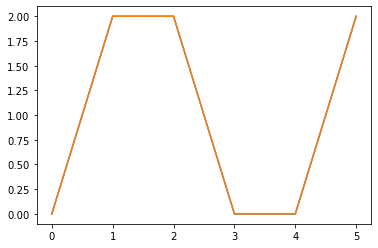

In [7]:
k = 2
path = "../DATA/6pts.txt"
nbPoint, points = loadPoints(path)
n = nbPoint-1
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Tests sur une courbe simple (ordre k=3; 6 points de contrôle; vecteur nodal uniforme)

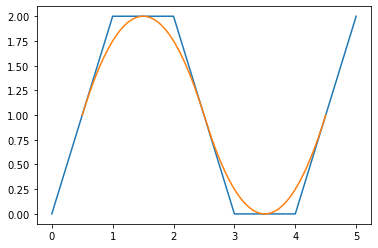

In [8]:
k = 3
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Tests sur une courbe simple (ordre k=4; 6 points de contrôle; vecteur nodal uniforme)

In [9]:
k = 4
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

### Une fois fait, ils expérimentent le tracé de courbes avec des B-Splines sur le tracé complexe utilisé pour la courbe de Bézier, avec différents ordres (k=2,3,4) et un vecteur nodal uniforme puis ouvert uniforme. (/2).
### Ils expérimenteront ensuite librement les courbes B-splines avec différents vecteurs nodaux (uniforme, ouvert uniforme, quelconque), différents ordres et différentes formes (ouverte, fermée, etc). (/3)

Test sur un tracé complexe avec boucle (ordre k=3; 16 points de contrôle; vecteur nodal uniforme)

In [10]:
k = 3
path = "../DATA/coeur.txt"
nbPoint, points = loadPoints(path)
n = nbPoint-1
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Test sur un tracé complexe avec boucles (ordre k=2; 18 points de contrôle; vecteur nodal uniforme)

In [11]:
k = 2
path = "../DATA/tournicoti.txt"
nbPoint, points = loadPoints(path)
n = nbPoint-1
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Test sur un tracé complexe avec boucles (ordre k=3; 18 points de contrôle; vecteur nodal uniforme)

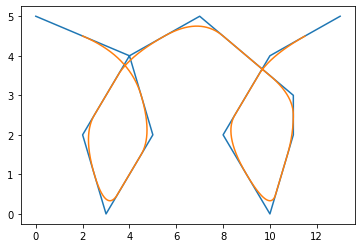

In [12]:
k = 3
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Test sur un tracé complexe avec boucles (ordre k=4; 18 points de contrôle; vecteur nodal uniforme)

In [13]:
k = 4
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Test sur un tracé complexe avec boucles (ordre k=3; 18 points de contrôle; vecteur nodal ouvert uniforme et vecteur nodal uniforme)

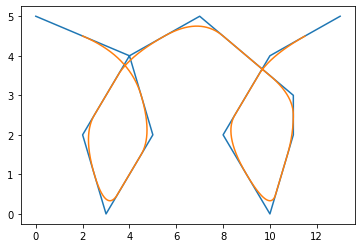

In [14]:
k = 3
nodal = getNodal("OUVERT UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)
nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

Test sur un tracé complexe avec boucles (ordre k=3; 17 points de contrôle; vecteur nodal uniforme et vecteur nodal ouvert uniforme)

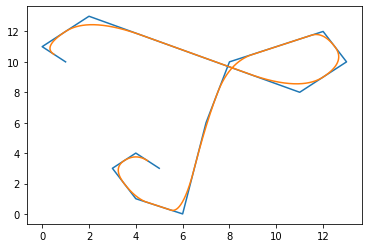

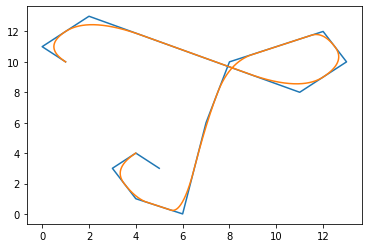

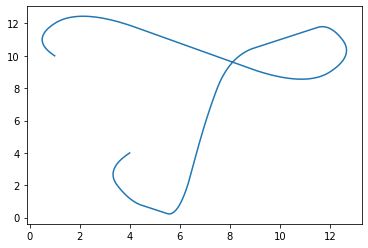

In [15]:
k = 3
path = "../DATA/s.txt"
nbPoint, points = loadPoints(path)
n = nbPoint - 1

nodal = getNodal("UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

nodal = getNodal("OUVERT UNIFORME", k, n)
val = bSpine(k, n, nodal, points)
afficher(path, val)

afficher(path, val, False)

Test sur un tracé complexe avec boucles, fermé (ordre k=3; 22 points de contrôle; vecteur nodal uniforme, vecteur nodal ouvert uniforme et vecteur nodal quelconque)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


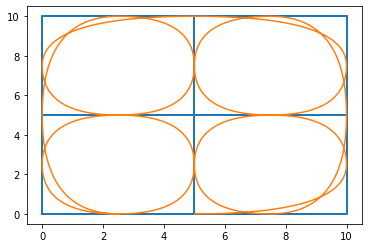

[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 19]


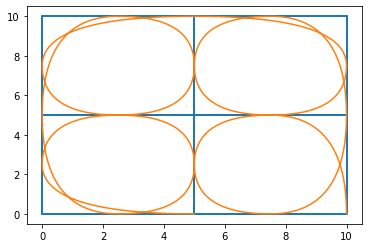

[741, 783, 785, 850, 900, 967, 1046, 1104, 1183, 1260, 1301, 1360, 1455, 1548, 1550, 1635, 1643, 1714, 1783, 1826, 1903, 1920, 1954, 1992]


In [16]:
k = 3
path = "../DATA/droleDeCaree.txt"
nbPoint, points = loadPoints(path)
n = nbPoint-1

nodal = getNodal("UNIFORME", k, n)
print(nodal)
val = bSpine(k, n, nodal, points)
afficher(path, val)

nodal = getNodal("OUVERT UNIFORME", k, n)
print(nodal)
val = bSpine(k, n, nodal, points)
afficher(path, val)

nodal = getNodal("QUELCONQUE", k, n)
print(nodal)
val = bSpine(k, n, nodal, points)
afficher(path, val)